In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('../assets/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [11]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [12]:
C = torch.randn((27, 2))

In [13]:
C

tensor([[-0.2737, -0.3687],
        [ 0.7503,  0.0859],
        [-1.3692, -0.6676],
        [-0.0242,  1.4282],
        [ 0.9373,  0.5520],
        [ 0.0884,  0.3766],
        [-0.7241, -0.2669],
        [ 1.2729, -0.9360],
        [ 0.1946,  0.2642],
        [ 0.1862, -0.5758],
        [ 0.9052,  0.5641],
        [-2.1568, -0.7089],
        [-0.0767, -1.2424],
        [-1.5574,  0.9542],
        [ 0.7204,  1.6961],
        [ 0.6246, -1.7635],
        [-0.2475, -0.4415],
        [ 0.0747, -0.3058],
        [ 0.3184,  1.9365],
        [ 1.8294, -0.8804],
        [ 1.1074, -0.1924],
        [ 0.7286,  0.5499],
        [ 0.0778, -0.4610],
        [ 1.2699, -0.0213],
        [ 0.2844,  1.7161],
        [-0.1896, -0.2264],
        [ 1.2785,  0.2518]])

In [14]:
C[5]

tensor([0.0884, 0.3766])

In [16]:
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.0884, 0.3766])

In [19]:
C[5] # gets row 5

tensor([0.0884, 0.3766])

In [20]:
C[[5, 6, 7]] # gets rows 5, 6, 7

tensor([[ 0.0884,  0.3766],
        [-0.7241, -0.2669],
        [ 1.2729, -0.9360]])

In [21]:
# we can also pass tensors
C[torch.tensor([5, 6, 7, 7, 7, 7])] # we can retrieve a single column multiple times

tensor([[ 0.0884,  0.3766],
        [-0.7241, -0.2669],
        [ 1.2729, -0.9360],
        [ 1.2729, -0.9360],
        [ 1.2729, -0.9360],
        [ 1.2729, -0.9360]])

In [22]:
C[X]

tensor([[[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.0884,  0.3766]],

        [[-0.2737, -0.3687],
         [ 0.0884,  0.3766],
         [-1.5574,  0.9542]],

        [[ 0.0884,  0.3766],
         [-1.5574,  0.9542],
         [-1.5574,  0.9542]],

        [[-1.5574,  0.9542],
         [-1.5574,  0.9542],
         [ 0.7503,  0.0859]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.6246, -1.7635]],

        [[-0.2737, -0.3687],
         [ 0.6246, -1.7635],
         [-0.0767, -1.2424]],

        [[ 0.6246, -1.7635],
         [-0.0767, -1.2424],
         [ 0.1862, -0.5758]],

        [[-0.0767, -1.2424],
         [ 0.1862, -0.5758],
         [ 0.0778, -0.4610]],

        [[ 0.1862, -0.5758],
         [ 0.0778, -0.4610],
         [ 0.1862, -0.5758]],

        [[ 0.0778, -0

In [23]:
C[X].shape

torch.Size([32, 3, 2])

In [24]:
X[13, 2]

tensor(1)

In [25]:
C[X][13, 2]

tensor([0.7503, 0.0859])

In [26]:
C[1]

tensor([0.7503, 0.0859])

In [28]:
X[0]

tensor([0, 0, 0])

In [29]:
C[0]

tensor([-0.2737, -0.3687])

In [30]:
C[X[0]]

tensor([[-0.2737, -0.3687],
        [-0.2737, -0.3687],
        [-0.2737, -0.3687]])

In [31]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [33]:
# since we have 3x2 embedding we have 6 inputs
W1 = torch.randn((6, 100)) # 100 is the neurons inside the layer which is variable to us
b1 = torch.randn(100)

In [35]:
emb @ W1 + b1 # we can't perform this because our emb shape is (32, 3, 2), we can't multiply with our W1 because it's shape is 6, 100, These are incompatible for multiplication

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [39]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [42]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1)

tensor([[-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.0884,  0.3766],
        [-0.2737, -0.3687,  0.0884,  0.3766, -1.5574,  0.9542],
        [ 0.0884,  0.3766, -1.5574,  0.9542, -1.5574,  0.9542],
        [-1.5574,  0.9542, -1.5574,  0.9542,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.6246, -1.7635],
        [-0.2737, -0.3687,  0.6246, -1.7635, -0.0767, -1.2424],
        [ 0.6246, -1.7635, -0.0767, -1.2424,  0.1862, -0.5758],
        [-0.0767, -1.2424,  0.1862, -0.5758,  0.0778, -0.4610],
        [ 0.1862, -0.5758,  0.0778, -0.4610,  0.1862, -0.5758],
        [ 0.0778, -0.4610,  0.1862, -0.5758,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.7503,  0.0859],
        [-0.2737, -0.3687,  0.7503,  0.0859,  0.0778, -0.4610],
        [ 0.7503,  0.0859,  0.0778, -0.4

In [43]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [51]:
emb

tensor([[[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.0884,  0.3766]],

        [[-0.2737, -0.3687],
         [ 0.0884,  0.3766],
         [-1.5574,  0.9542]],

        [[ 0.0884,  0.3766],
         [-1.5574,  0.9542],
         [-1.5574,  0.9542]],

        [[-1.5574,  0.9542],
         [-1.5574,  0.9542],
         [ 0.7503,  0.0859]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687]],

        [[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.6246, -1.7635]],

        [[-0.2737, -0.3687],
         [ 0.6246, -1.7635],
         [-0.0767, -1.2424]],

        [[ 0.6246, -1.7635],
         [-0.0767, -1.2424],
         [ 0.1862, -0.5758]],

        [[-0.0767, -1.2424],
         [ 0.1862, -0.5758],
         [ 0.0778, -0.4610]],

        [[ 0.1862, -0.5758],
         [ 0.0778, -0.4610],
         [ 0.1862, -0.5758]],

        [[ 0.0778, -0

In [50]:
emb.shape

torch.Size([32, 3, 2])

In [57]:
torch.unbind(emb, dim=1)

(tensor([[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.0884,  0.3766],
         [-1.5574,  0.9542],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.6246, -1.7635],
         [-0.0767, -1.2424],
         [ 0.1862, -0.5758],
         [ 0.0778, -0.4610],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.7503,  0.0859],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0.1862, -0.5758],
         [ 1.8294, -0.8804],
         [ 0.7503,  0.0859],
         [-1.3692, -0.6676],
         [ 0.0884,  0.3766],
         [-0.0767, -1.2424],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 1.8294, -0.8804],
         [ 0.6246, -1.7635],
         [-0.2475, -0.4415],
         [ 0.1946,  0.2642]]),
 tensor([[-0.2737, -0.3687],
         [-0.2737, -0.3687],
         [ 0

In [82]:
torch.cat(torch.unbind(emb, dim=1), dim=1) # this is inefficient

tensor([[-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.0884,  0.3766],
        [-0.2737, -0.3687,  0.0884,  0.3766, -1.5574,  0.9542],
        [ 0.0884,  0.3766, -1.5574,  0.9542, -1.5574,  0.9542],
        [-1.5574,  0.9542, -1.5574,  0.9542,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.6246, -1.7635],
        [-0.2737, -0.3687,  0.6246, -1.7635, -0.0767, -1.2424],
        [ 0.6246, -1.7635, -0.0767, -1.2424,  0.1862, -0.5758],
        [-0.0767, -1.2424,  0.1862, -0.5758,  0.0778, -0.4610],
        [ 0.1862, -0.5758,  0.0778, -0.4610,  0.1862, -0.5758],
        [ 0.0778, -0.4610,  0.1862, -0.5758,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.7503,  0.0859],
        [-0.2737, -0.3687,  0.7503,  0.0859,  0.0778, -0.4610],
        [ 0.7503,  0.0859,  0.0778, -0.4

In [61]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([32, 6])

In [62]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [63]:
a.shape

torch.Size([18])

In [68]:
a.view(3, 3, 2) # this is extremely efficient operation

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [69]:
a.storage() # this is how it is stored in the computer memory

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [70]:
emb.shape

torch.Size([32, 3, 2])

In [72]:
emb.view(32, 6)

tensor([[-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.0884,  0.3766],
        [-0.2737, -0.3687,  0.0884,  0.3766, -1.5574,  0.9542],
        [ 0.0884,  0.3766, -1.5574,  0.9542, -1.5574,  0.9542],
        [-1.5574,  0.9542, -1.5574,  0.9542,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.6246, -1.7635],
        [-0.2737, -0.3687,  0.6246, -1.7635, -0.0767, -1.2424],
        [ 0.6246, -1.7635, -0.0767, -1.2424,  0.1862, -0.5758],
        [-0.0767, -1.2424,  0.1862, -0.5758,  0.0778, -0.4610],
        [ 0.1862, -0.5758,  0.0778, -0.4610,  0.1862, -0.5758],
        [ 0.0778, -0.4610,  0.1862, -0.5758,  0.7503,  0.0859],
        [-0.2737, -0.3687, -0.2737, -0.3687, -0.2737, -0.3687],
        [-0.2737, -0.3687, -0.2737, -0.3687,  0.7503,  0.0859],
        [-0.2737, -0.3687,  0.7503,  0.0859,  0.0778, -0.4610],
        [ 0.7503,  0.0859,  0.0778, -0.4

In [73]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [80]:
h = emb.view(emb.shape[0], 6) @ W1 + b1 # we can use -1 insted of emb.shape[0], then pytorch will automatically infer that

In [81]:
h.shape

torch.Size([32, 100])

In [83]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [84]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [85]:
h

tensor([[ 0.5108, -0.3643,  0.5595,  ...,  0.6922,  0.2549, -0.7297],
        [ 0.2494,  0.4401, -0.1480,  ...,  0.8465,  0.7582,  0.4602],
        [ 0.0151,  0.7396, -0.3272,  ..., -0.2623,  0.3008,  0.9933],
        ...,
        [ 0.9840,  0.9633, -0.5185,  ...,  0.9404,  0.9826, -0.8914],
        [ 0.5195,  0.3575,  0.9521,  ...,  0.2680,  0.4527, -0.4629],
        [-0.1286,  0.2696,  0.4481,  ...,  0.7308,  0.5683, -0.2097]])

In [86]:
h.shape

torch.Size([32, 100])

In [87]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [88]:
logits = h @ W2 + b2

In [89]:
logits.shape

torch.Size([32, 27])

In [90]:
counts = logits.exp()

In [91]:
prob = counts / counts.sum(dim=1, keepdims=True)

In [92]:
prob.shape

torch.Size([32, 27])

In [93]:
prob[0].sum()

tensor(1.0000)

In [94]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [95]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [96]:
prob[torch.arange(32), Y]

tensor([4.0813e-03, 3.9442e-11, 2.5832e-12, 2.1868e-01, 1.1815e-03, 2.2095e-11,
        9.7171e-07, 5.3436e-07, 1.8009e-06, 1.8702e-01, 3.4764e-08, 3.1395e-03,
        2.6448e-08, 1.0579e-03, 6.3017e-10, 2.0784e-08, 5.2883e-01, 1.9697e-11,
        2.2057e-10, 3.0765e-12, 4.1683e-06, 2.6823e-09, 5.2786e-09, 1.1067e-11,
        3.9640e-11, 2.0902e-11, 8.6381e-10, 5.0335e-07, 9.0067e-10, 9.6576e-01,
        3.4958e-09, 1.6605e-04])

In [97]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.6760)

In [98]:
# ------------------- now made respectable :) ------------------

In [142]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [143]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [209]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [210]:
sum(p.nelement()for p in parameters) # number of parameters in total

3481

In [135]:
emb = C[X] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [117]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [118]:
emb = C[X] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(dim=1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

In [211]:
for p in parameters:
    p.requires_grad = True

In [148]:
for _ in range(10):
    # forward pass
    emb = C[X] # (32, 2, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
# print(loss.item())

10.709586143493652
10.407631874084473
10.127808570861816
9.864364624023438
9.614503860473633
9.376440048217773
9.148944854736328
8.931110382080078
8.722230911254883
8.521748542785645


In [124]:
logits.max(dim=1)

torch.return_types.max(
values=tensor([13.4137, 17.9642, 20.6772, 20.7270, 16.8571, 13.4137, 16.1144, 14.2716,
        16.0137, 18.5008, 16.0737, 21.0530, 13.4137, 17.2579, 17.2660, 20.2017,
        13.4137, 16.7056, 15.2577, 17.2023, 18.6939, 16.1055, 10.9961, 10.7941,
        15.5882, 13.4137, 16.2898, 17.0881, 12.8240, 16.2915, 19.2256, 16.1887],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [125]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [149]:
# it's taking so much time right so we make the batches and pass them
torch.randint(0, 5, (32,))

tensor([0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1, 3, 4, 3, 1, 4, 0, 0, 4, 1, 1, 3, 2,
        3, 4, 2, 1, 0, 2, 3, 3])

In [150]:
torch.randint(0, X.shape[0], (32,))

tensor([ 35791, 163580,  20513, 103857, 228116, 154299, 220242, 160888,  20433,
        226383,  93162, 185772, 115061, 132831,  89331,  54516, 122196,  64584,
        142976,  27299, 184468,  52049,  72358, 196236,  77576,  38119,  81480,
         17873, 136692, 134001, 104593,   1442])

In [160]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [158]:
for _ in range(100):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32, 2, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

3.224215269088745


In [159]:
emb = C[X] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.8468, grad_fn=<NllLossBackward0>)

In [202]:
lri = []
lossi = []
for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32, 2, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
# print(loss.item())

18.65423583984375
19.653993606567383
18.04652976989746
19.96993064880371
18.834854125976562
20.852285385131836
18.41462516784668
18.06996726989746
19.762052536010742
22.003082275390625
19.572893142700195
18.119646072387695
19.40363311767578
20.34633445739746
22.564905166625977
19.031780242919922
15.069063186645508
17.81289291381836
21.26393699645996
19.14421844482422
17.656400680541992
19.571374893188477
22.8865966796875
18.583829879760742
20.49425506591797
17.504169464111328
17.866439819335938
18.85320281982422
20.14896583557129
19.466785430908203
17.48484230041504
18.370437622070312
18.868682861328125
20.728057861328125
18.5418758392334
14.075275421142578
18.539297103881836
16.973356246948242
17.02254295349121
19.4163761138916
19.239240646362305
18.113739013671875
15.352042198181152
17.26504135131836
18.615856170654297
16.79395294189453
18.80624771118164
15.527763366699219
17.636960983276367
17.19744873046875
16.08733367919922
18.330265045166016
19.14191246032715
16.312923431396484
1

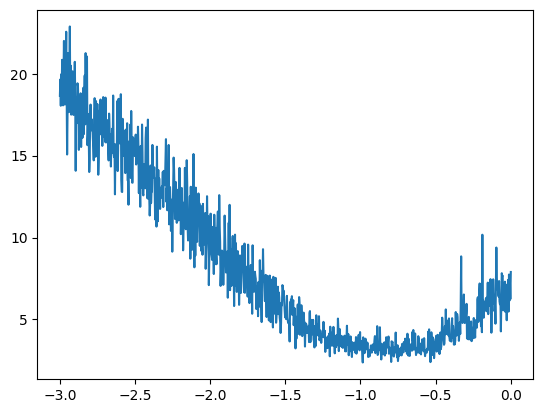

In [203]:
plt.plot(lri, lossi)

In [222]:
lri = []
lossi = []
for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (32, 2, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # update
    # lr = lrs[i]
    # lr = 10**-1
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
# print(loss.item())

In [223]:
emb = C[X] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3301, grad_fn=<NllLossBackward0>)

In [224]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [237]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
    
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [238]:
n1

25626

In [239]:
n2

28829

In [240]:
n2 - n1

3203

In [241]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182437, 3]), torch.Size([182437]))

In [286]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [287]:
sum(p.nelement()for p in parameters) # number of parameters in total

11897

In [288]:
for p in parameters:
    p.requires_grad = True

In [289]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [290]:
lri = []
lossi = []
stepi = []

In [315]:

for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]] # (32, 2, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # update
    # lr = lrs[i]
    # lr = 10**-1
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
# print(loss.item())

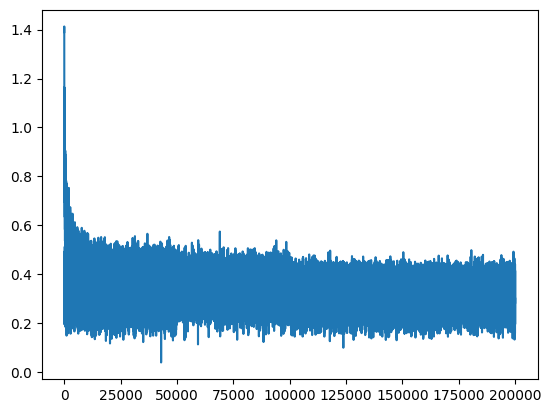

In [316]:
plt.plot(stepi, lossi)

In [317]:
print(loss.item())

1.9951305389404297


In [318]:
emb = C[Xtr] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0863, grad_fn=<NllLossBackward0>)

In [319]:
emb = C[Xdev] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1539, grad_fn=<NllLossBackward0>)

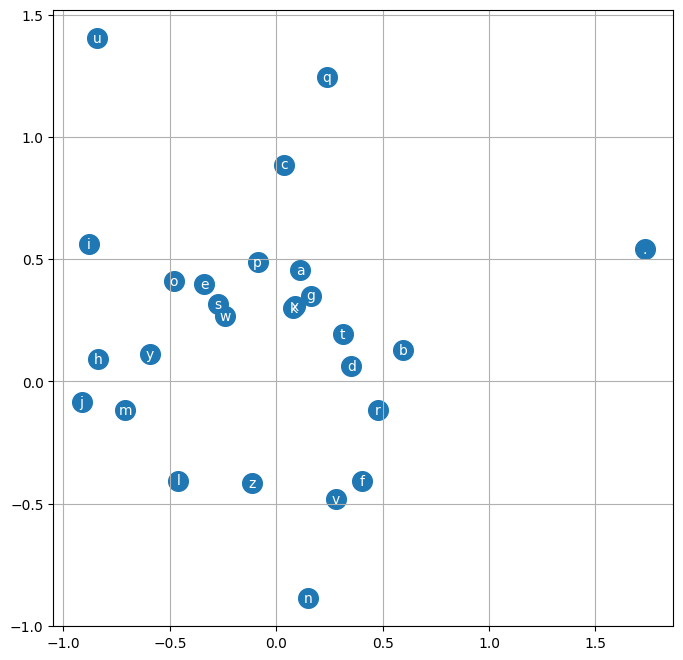

In [320]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [322]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))
        

mohanimyah.
see.
madhayla.
rensleighdraige.
zehedgelin.
shi.
jen.
eden.
camra.
raylynn.
hone.
cayshubergiaghiel.
kindrenellennie.
cayu.
zayven.
jamell.
eli.
kayshiannyla.
hil.
calynn.
